In [191]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 16)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
import scipy as science

In [3]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [412]:
#Параметризация цилиндрической кривой, которая относительно осей x и z построена как кубическая парабола, 
#но при этом добавлена затухающая спираль для осей y,z.
#На вход подается радиус для генерации точек в разрезе цилиндра, границы параметров u,theta и число точек
def cylinder(R, u_min, u_max, theta_max, N):
    u = np.random.uniform(u_min, u_max, N)
    theta = np.random.uniform(0, theta_max, N)
    r = np.random.uniform(0, R, N)
    x = u+(3*u*u*r*np.cos(theta))/np.sqrt(1 + 9*u**4)
    z = u**3/9-(r*np.cos(theta))/np.sqrt(1 + 9*u**4)+np.exp(-u*u/3)*np.sin(6*u)*2
    y= np.exp(-u*u/3)*np.cos(6*u)*2-r*np.sin(theta)
    #x=(x+np.sin(z*8))/40+z*0.4
    #x=x+z*0.4
    XX=[]
    for i in range(N):
       XX.append([x[i],y[i]])
    return x, y, z ,XX

In [417]:
x_cyl, y_cyl, z_cyl,X = cylinder(0.9, -3, 3, 2 * np.pi, 500)

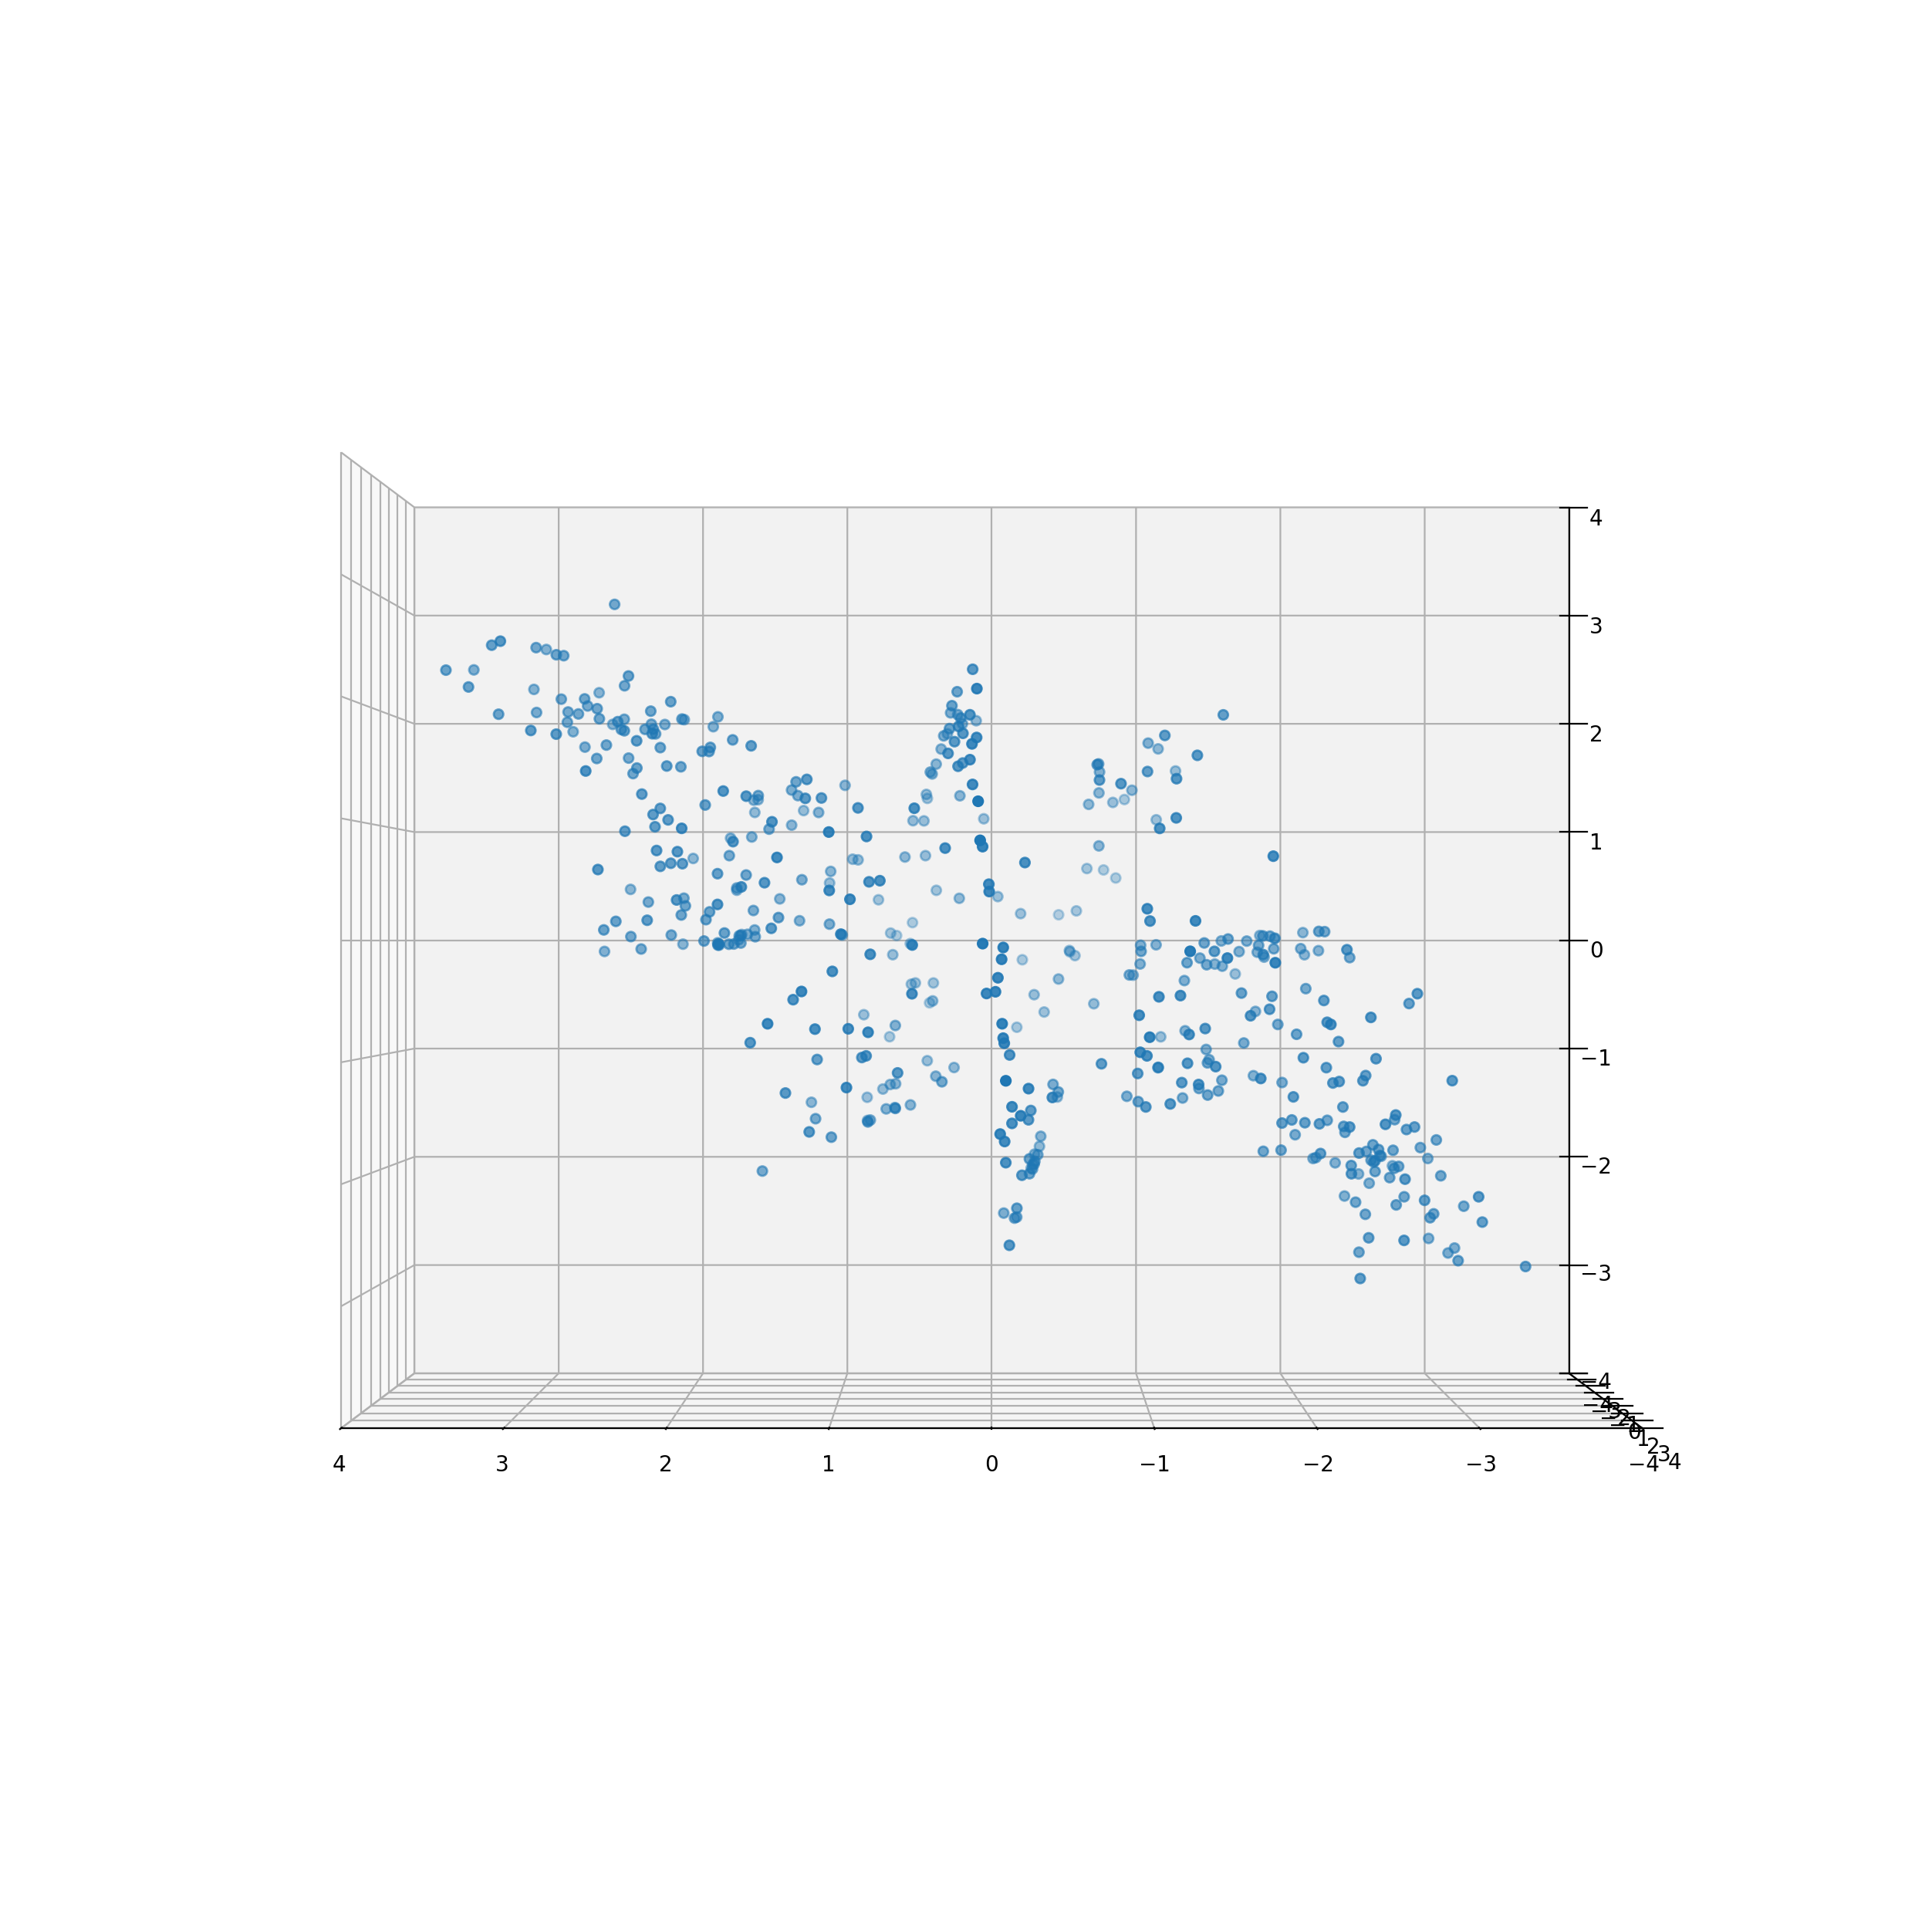

In [435]:
#Картинка получившейся фигуры
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(x_cyl, y_cyl, z_cyl)
ax.axes.set_xlim3d(left=-4, right=4) 
ax.axes.set_ylim3d(bottom=-4, top=4) 
ax.axes.set_zlim3d(bottom=-4, top=4)
#Варьируемые углы для просмотра
ax.view_init(0,90,0)
plt.show()

In [419]:
X=np.array(X)
#Вид пар точек (x,y) для обучения
X

array([[ 1.98513655, -1.14072532],
       [-0.64558976, -1.21961015],
       [ 0.05707072,  2.34447134],
       [ 1.80586098, -0.58752286],
       [-0.89047547, -0.51696785],
       [ 2.47325038, -0.20348835],
       [-0.71149982, -1.01776035],
       [-0.08895816,  2.56415196],
       [ 1.276796  , -0.49776597],
       [-1.88438114, -1.29181467],
       [ 0.53892184, -1.72567117],
       [-1.37241125, -0.53181664],
       [ 2.00358236, -0.0199853 ],
       [-0.06651113,  1.88022744],
       [ 0.45290836, -1.5187044 ],
       [ 2.61352426,  1.04311318],
       [-1.38129562,  0.72316525],
       [ 0.12568403,  1.6042798 ],
       [-0.7123841 , -0.6683199 ],
       [ 0.40481317, -0.56910676],
       [-0.2355463 ,  1.51667505],
       [ 3.22210959,  0.05063483],
       [ 2.00872959,  0.45740715],
       [ 2.18713132,  0.43897435],
       [ 0.52492231, -1.35601311],
       [-2.07552482, -0.99961226],
       [-2.13741233, -0.55667083],
       [-0.18480531,  1.76713182],
       [ 1.67209667,

In [420]:
n=5
#Кол-во Dense слоев в нейроной сети, которые подбирают параметры 

In [421]:
model=[]
for i in range(n):
    model.append(Sequential())
    if i>0:
        model[i].add(Dense(2, input_dim=2, activation='linear'))
        for j in range(i):
            model[i].add(Dense(2, input_dim=2, activation='linear'))
        model[i].add(Dense(1, input_dim=2, activation='linear'))
    else:
        model[i].add(Dense(1, input_dim=2, activation='linear'))

In [422]:
for i in range(n):
    model[i].compile(loss = 'mse', optimizer='sgd')
    # В данном случае минимизируется среднеквадратичная ошибка,'sgd','adam'

In [423]:
for i in range(n):
    model[i].fit(X, z_cyl, epochs=50, batch_size=10);
    # Теперь запускается сама оптимизация параметров модели.

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 2.6833
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.0618
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.0477
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 1.0493
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1.0396
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.0685
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.1293
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.0118
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.1199
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.0138
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.0787
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.0704
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.1124 
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.0473
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - l

In [424]:
#Генерация пар точек, где x от -5 до 5, а y равен 0 
x = np.arange(-5, 5, 0.02)
y=np.array([0]*500)
xy = np.vstack((x.flatten(), y.flatten())).T

In [425]:
z_pred=[]
for i in range(n):
    z_pred.append(model[i].predict(xy))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [426]:
#Преобразование в вектор
z_pred[0].transpose()[0]

array([-2.7295346e+00, -2.7188821e+00, -2.7082293e+00, -2.6975768e+00,
       -2.6869240e+00, -2.6762712e+00, -2.6656187e+00, -2.6549659e+00,
       -2.6443133e+00, -2.6336606e+00, -2.6230078e+00, -2.6123552e+00,
       -2.6017025e+00, -2.5910497e+00, -2.5803969e+00, -2.5697441e+00,
       -2.5590916e+00, -2.5484388e+00, -2.5377862e+00, -2.5271335e+00,
       -2.5164809e+00, -2.5058281e+00, -2.4951754e+00, -2.4845228e+00,
       -2.4738700e+00, -2.4632175e+00, -2.4525647e+00, -2.4419119e+00,
       -2.4312594e+00, -2.4206066e+00, -2.4099541e+00, -2.3993013e+00,
       -2.3886487e+00, -2.3779960e+00, -2.3673432e+00, -2.3566906e+00,
       -2.3460379e+00, -2.3353853e+00, -2.3247323e+00, -2.3140795e+00,
       -2.3034270e+00, -2.2927742e+00, -2.2821217e+00, -2.2714689e+00,
       -2.2608161e+00, -2.2501636e+00, -2.2395108e+00, -2.2288582e+00,
       -2.2182055e+00, -2.2075529e+00, -2.1969001e+00, -2.1862473e+00,
       -2.1755948e+00, -2.1649420e+00, -2.1542895e+00, -2.1436367e+00,
      

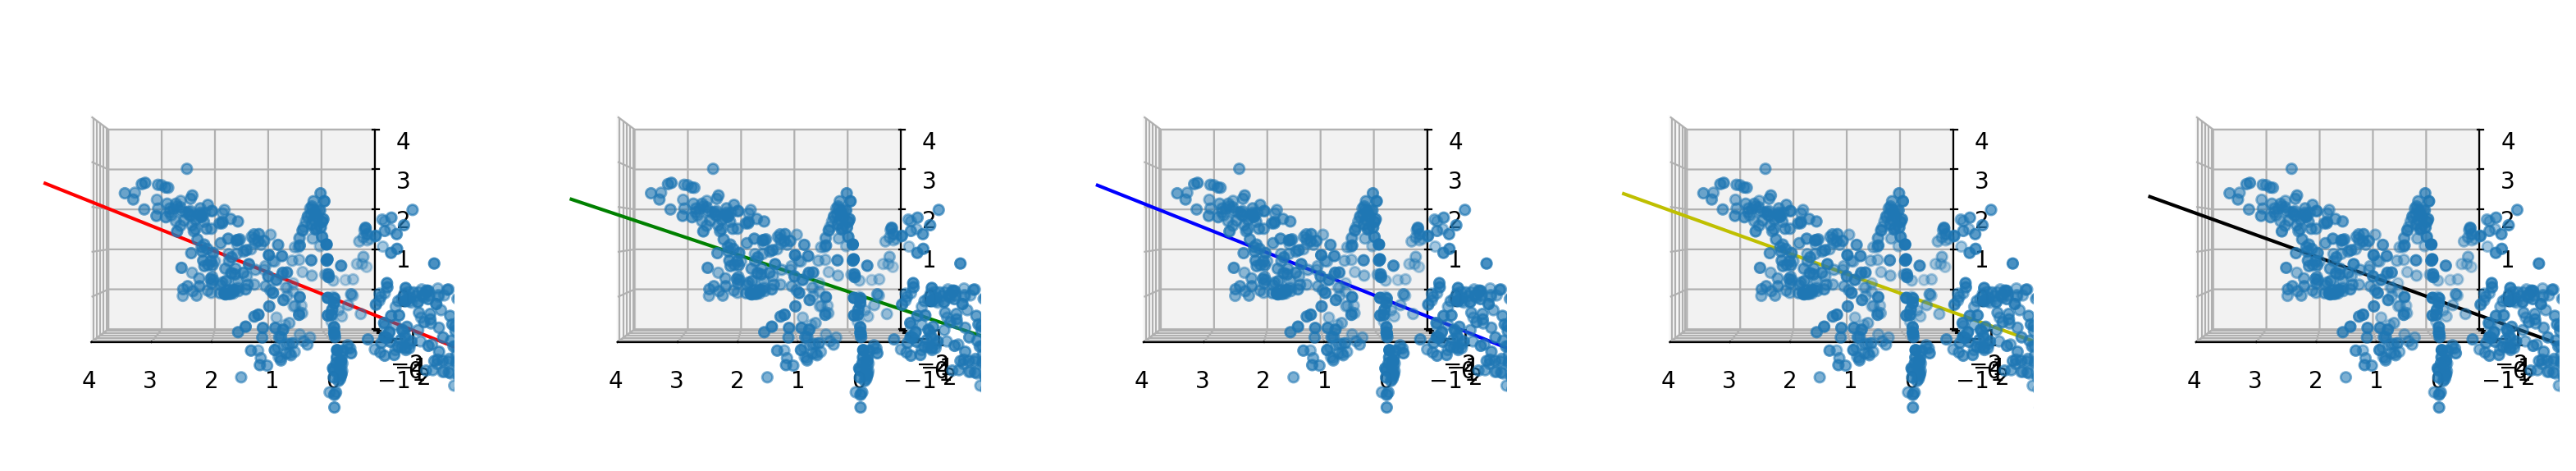

In [434]:
#Получение картинок прогноза для сравнения
fig = plt.figure()
colors = ['r', 'g', 'b', 'y','k']
for i in range(n):
    ax = fig.add_subplot(1, n, i+1, projection="3d")
    ax.scatter(x_cyl, y_cyl, z_cyl)
    ax.axes.set_xlim3d(left=-1, right=4) 
    ax.axes.set_ylim3d(bottom=-2.5, top=2.5) 
    ax.axes.set_zlim3d(bottom=-1, top=4)
    ax.plot(x,y,z_pred[i].transpose()[0], color=colors[i])
    ax.view_init(0,90,0)
plt.show()